In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'intencity_transformed_image')

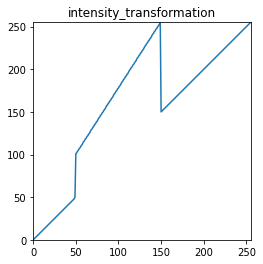

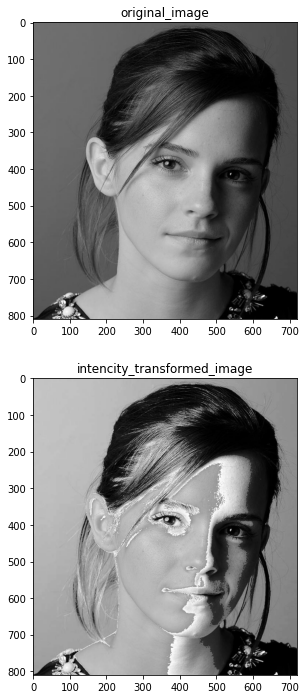

In [20]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
print(f.size)
assert f is not None

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(50, 100, 0)
t3 = np.linspace(101, 255, 100)
t4 = np.linspace(255, 150, 0)
t5 = np.linspace(150, 255, 106)

t = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()
ax.plot(t)

ax.set_title('intensity_transformation')
ax.set_aspect('equal')
plt.xlim([0, 255])
plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0].imshow(f)
ax[0].set_title('original_image')
ax[1].imshow(g)
ax[1].set_title('intencity_transformed_image')
